# Image classification

In [43]:
!pip install ipython-autotime   ### to find execution time
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.95 s (started: 2021-10-17 13:14:47 +00:00)


In [44]:



%rm -rf image

time: 125 ms (started: 2021-10-17 13:14:50 +00:00)


## Gathering Data

**Using python Librariers Bing Image Downloader to scrape the images**

In [45]:
!pip install bing-image-downloader

time: 2.84 s (started: 2021-10-17 13:14:54 +00:00)


In [46]:
!mkdir image

time: 127 ms (started: 2021-10-17 13:14:57 +00:00)


In [47]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=100,output_dir='image',
                                                    adult_filter_off=True)

[%] Downloading Images to /content/image/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://pics.davesgarden.com/pics/2006/06/01/joebloom/39dd00.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.naturallivingideas.com/wp-content/uploads/2017/05/growing-sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/02/1d/47/021d47fc75f0ae80733a54330adf10d7.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://ashleyshortphotography.com/wp-content/uploads/2018/12/06-1296-post/senior-with-sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://lh5.ggpht.com/-zBdtpWaZrXg/UjkfJu_NHDI/AAAAAAAAEzQ/JJ7gis5le6U/No-Knead-Honey-Roasted-Sunflower-See.jpg?imgmax=800
[%] File Downloaded !

[%] Downloading Image #6 from http://bit.ly/pFrFHq
[%] File Downloaded !

[%] Downloading Image #7 from http://bit.ly/r5JSFc
[%] File Downloaded !

[%] Downloading Imag

In [48]:
from bing_image_downloader import downloader
downloader.download("ice cream cone",limit=100,output_dir='image',
                                                    adult_filter_off=True)

[%] Downloading Images to /content/image/ice cream cone


[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from http://hersheyspcb.com/wp-content/uploads/2015/02/coneopeningpage.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://d2rd7etdn93tqb.cloudfront.net/wp-content/uploads/2016/09/ice-cream-cone-fruit-waffle-bowl-090716.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.pepper.ph/wp-content/uploads/2017/03/Soft-Serve4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://karaspartyideas.com/wp-content/uploads/2020/07/A-22Two-Sweet22-2nd-Birthday-Pastel-Pool-Party-via-Karas-Party-Ideas-KarasPartyIdeas.com10.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://spoonuniversity.com/wp-content/uploads/2016/03/1.gif
[%] File Downloaded !

[%] Downloading Image #6 from https://www.bing.com/th/id/OGC.eb232ae9f3b3d1439cabb9075665e6d7?pid=1.7&amp;rurl=https%3a%2f%2fspoonuniversity.com%2fwp-content%2fupload

In [49]:
from bing_image_downloader import downloader
downloader.download("rugby ball leather",limit=100,output_dir='image',
                                                    adult_filter_off=True)

[%] Downloading Images to /content/image/rugby ball leather


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://i.ebayimg.com/images/g/7nMAAOSwDPNcDd1B/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0285/7618/6421/products/cricket-australia-swing-ball-2.2021-09-26.17-11-53_1800x1800.jpg?v=1632641105
[%] File Downloaded !

[%] Downloading Image #3 from https://www.victeamsports.com/wp-content/uploads/2020/06/IMG_9831-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.vision.com.pk/wp-content/uploads/2020/04/vb100_2-1024x1024.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://mikasasports.com/wp-content/uploads/2016/01/VFC1000-USA.png
[%] File Downloaded !

[%] Downloading Image #6 from http://94fiftybasketball.weebly.com/uploads/1/8/4/7/18470366/1440585136.png
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn.shopify.com/s/files/1/0285/7618/642

**Now Data is ready ...we can start building our model**

## Preprocessing

* Resizing
* Flatten


In [50]:
import numpy as np
a=np.array([[1,2,3,4,5],
            [4,5,6,7,8]])
a.ndim

2

time: 4.13 ms (started: 2021-10-17 13:16:05 +00:00)


converting two dim to 1-d

In [51]:
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 5.21 ms (started: 2021-10-17 13:16:05 +00:00)


/content/image/pretty sunflower
/content/image/ice cream cone
/content/image/rugby ball leather


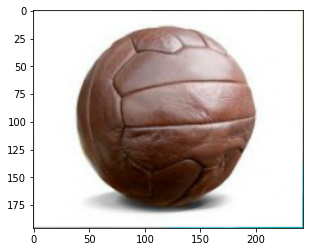

time: 388 ms (started: 2021-10-17 13:16:05 +00:00)


In [52]:
import os  ##for going around in folder
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.io import imread    ## reading images you can also use opencv
from skimage.transform import resize

## we need data in two differnt format
# pixels can be in the form of height or width



DATADIR = '/content/image'
CATEGORIES =['pretty sunflower','ice cream cone','rugby ball leather']
for cat in CATEGORIES:
  class_num=CATEGORIES.index(cat) ##Label encoding
  path=os.path.join(DATADIR,cat) #We create path  because we want a specific path for images
  # /content/image
  print(path)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img)) ## along with path we need to mention image name as well
    ##print(img_array.shape)
    plt.imshow(img_array)
    ## write(img_array) to get matrix code
    break ## since we want one image



 if we use no instead of names ml will be easier


### 1. Resizing

In [53]:
target=[]
images=[]
flat_data=[] ## images can't be passed
 
for cat in CATEGORIES:
  class_num=CATEGORIES.index(cat) ##Label encoding
  path=os.path.join(DATADIR,cat) 
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img)) 
    img_resized=resize(img_array,(150,150,3)) ## normalizes the value from 0 to 1
    images.append(img_resized)
    flat_data.append(img_resized.flatten())
    target.append(class_num)
## we will convert it into numpy arrays if not converted
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

time: 43.6 s (started: 2021-10-17 13:16:06 +00:00)


In [54]:
flat_data[0]

array([0.06666667, 0.08235294, 0.1254902 , ..., 0.28589155, 0.24667586,
       0.24830453])

time: 3.09 ms (started: 2021-10-17 13:16:49 +00:00)


In [55]:
flat_data

array([[0.06666667, 0.08235294, 0.1254902 , ..., 0.28589155, 0.24667586,
        0.24830453],
       [1.        , 1.        , 1.        , ..., 0.95392157, 0.95392157,
        0.98905229],
       [0.6       , 0.63158745, 0.67440523, ..., 0.22808418, 0.25150327,
        0.25566013],
       ...,
       [0.44705882, 0.45490196, 0.41176471, ..., 0.84705882, 0.61176471,
        0.29555556],
       [0.44705882, 0.45490196, 0.41176471, ..., 0.84705882, 0.61176471,
        0.29555556],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

time: 3.64 ms (started: 2021-10-17 13:16:49 +00:00)


In [56]:
150*150*3

67500

time: 2.47 ms (started: 2021-10-17 13:16:49 +00:00)


In [57]:

len(flat_data[0])

67500

time: 2.72 ms (started: 2021-10-17 13:16:49 +00:00)


In [58]:

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 4.13 ms (started: 2021-10-17 13:16:49 +00:00)


<BarContainer object of 3 artists>

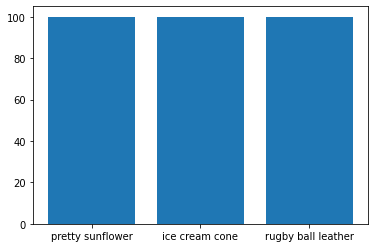

time: 156 ms (started: 2021-10-17 13:16:49 +00:00)


In [59]:
unique,count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [60]:
unique

array([0, 1, 2])

time: 3.25 ms (started: 2021-10-17 13:16:50 +00:00)


In [61]:
count

array([100, 100, 100])

time: 2.99 ms (started: 2021-10-17 13:16:50 +00:00)


time: 10.5 ms (started: 2021-10-17 13:16:50 +00:00)


### Split Data into training and Testing

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.30,random_state=109)

time: 68.1 ms (started: 2021-10-17 13:16:50 +00:00)


#### we will use svm classification algorithm

In [63]:
## helpful in generating a very good hyperplane

time: 748 µs (started: 2021-10-17 13:16:50 +00:00)


In [64]:
## parameters using in svm are proper so use gridsearchcv
## you need hyperparameter
##gamma=kernel coeffecient
## identifying arguments and parameters for svm use gridsearchcv

time: 785 µs (started: 2021-10-17 13:16:50 +00:00)


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

## along with this probability i want other probabilities

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 7min 41s (started: 2021-10-17 13:16:50 +00:00)


In [66]:
y_pred=clf.predict(x_test)
y_pred

array([0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2,
       0, 0])

time: 502 ms (started: 2021-10-17 13:24:31 +00:00)


In [67]:
y_test

array([0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2,
       0, 0])

time: 3.02 ms (started: 2021-10-17 13:24:32 +00:00)


In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 675 µs (started: 2021-10-17 13:24:32 +00:00)


In [69]:
accuracy_score(y_pred,y_test)

1.0

time: 11.8 ms (started: 2021-10-17 13:24:32 +00:00)


In [70]:
confusion_matrix(y_pred,y_test) ## evaluation matrix..all data points can be varied properly

array([[37,  0,  0],
       [ 0, 30,  0],
       [ 0,  0, 23]])

time: 4.47 ms (started: 2021-10-17 13:24:32 +00:00)


In [71]:
from sklearn.metrics import classification_report
import numpy as np
y_pred=clf.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      1.00      0.58        37
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        23

    accuracy                           0.41        90
   macro avg       0.14      0.33      0.19        90
weighted avg       0.17      0.41      0.24        90

time: 505 ms (started: 2021-10-17 13:24:32 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
## Saving the model using pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 52.5 ms (started: 2021-10-17 13:24:32 +00:00)


In [73]:
model=pickle.load(open('img_model.p','rb'))

time: 21.8 ms (started: 2021-10-17 13:24:32 +00:00)


### Testing a brand new image

In [ ]:
flat_data=[]
url=input('Enter the url of image')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out= CATEGORIES[y_out[0]] ## As it is in two dimension
print(f'PREDICTED OUTPUT:{y_out}')

In [92]:
import cv2
from PIL import Image, ImageOps
import numpy as np

time: 580 ms (started: 2021-10-17 16:50:57 +00:00)


Saving download.jpg to download (2).jpg


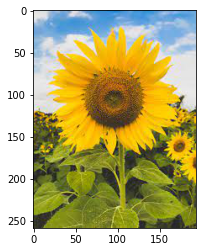

time: 10.9 s (started: 2021-10-17 17:04:03 +00:00)


In [97]:
from google.colab import files
from io import BytesIO
import matplotlib.pyplot as plt


uploaded = files.upload()
im = Image.open(BytesIO(uploaded['download.jpg']))
##View the image in google colab notebook using following command:
plt.imshow(im)
plt.show()






### Creating a function so calling it becomes easier


In [112]:
def show(image):
   flat_data=[]
   CATEGORIES=CATEGORIES =['pretty sunflower','ice cream cone','rugby ball leather']
   img=np.array(image)
   img_resized=resize(img,(150,150,3))
   flat_data.append(img_resized.flatten())
   flat_data=np.array(flat_data)
   print(img.shape)
   plt.imshow(img_resized)
   y_out=model.predict(flat_data)
   y_out= CATEGORIES[y_out[0]] ## As it is in two dimension
   print(f'PREDICTED OUTPUT:{y_out}')
 

time: 6.86 ms (started: 2021-10-17 17:13:34 +00:00)


Saving ice.jpg to ice (1).jpg


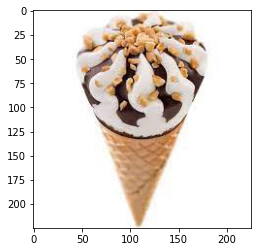

time: 7.37 s (started: 2021-10-17 17:12:48 +00:00)


In [109]:
uploaded = files.upload()
im1 = Image.open(BytesIO(uploaded['ice.jpg']))
##View the image in google colab notebook using following command:
plt.imshow(im1)
plt.show()

Saving 2.jpg to 2 (3).jpg


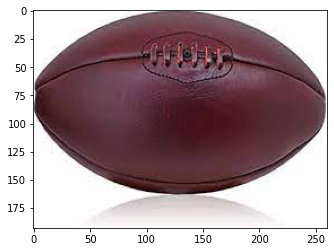

time: 20.2 s (started: 2021-10-17 17:21:24 +00:00)


In [127]:

uploaded = files.upload()
im2 = Image.open(BytesIO(uploaded['2.jpg']))
##View the image in google colab notebook using following command:
plt.imshow(im2)
plt.show()

(193, 261, 3)
PREDICTED OUTPUT:rugby ball leather


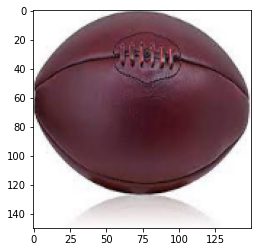

time: 281 ms (started: 2021-10-17 17:21:49 +00:00)


In [128]:
show(im2)

(225, 225, 3)
PREDICTED OUTPUT:ice cream cone


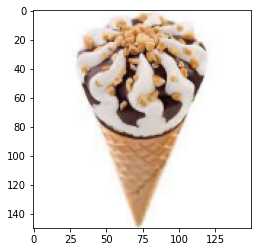

time: 266 ms (started: 2021-10-17 17:13:40 +00:00)


In [113]:
show(im1)